<a href="https://colab.research.google.com/github/AiswaryaGoriparthi/Aiswarya_INFO5731_Fall2024/blob/main/Goriparthi_Aiswarya_Exercise_04_ipynb%2C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## Question 1 (10 Points)

**Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [30]:
# Write your code here
!pip install nltk gensim


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim import corpora
from gensim.models import LdaModel, CoherenceModel

# Step 1: Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Step 2: Load the  corpus (Product Reviews)
corpus = [
   "This product is amazing!",
    "I love it, highly recommend!",
    "I absolutely hate this item.",
    "It's okay, not the best but not terrible.",
    "Worst purchase I've ever made.",
    "Product amazing!",
    "Love it, highly recommend!",
    "Absolutely hate item.",
    "Okay, not best, not terrible.",
    "Worst purchase ever.",
    "Outstanding quality!",
    "Very satisfied with product.",
    "Disappointed with performance.",
    "Fantastic value for money!",
    "Wouldn't buy again.",
    "Exceeded expectations!",
]

# Step 3: Preprocess the text data
stop_words = set(stopwords.words('english'))

def preprocess(text):
    tokens = word_tokenize(text.lower())  # Tokenize and lowercase
    return [word for word in tokens if word.isalpha() and word not in stop_words]  # Remove stopwords and punctuation

processed_docs = [preprocess(doc) for doc in corpus]  # Apply preprocessing

# Step 4: Create a dictionary and corpus for LDA
dictionary = corpora.Dictionary(processed_docs)
corpus_gensim = [dictionary.doc2bow(doc) for doc in processed_docs]

# Step 5: Define a function to compute coherence scores for different topic numbers
def compute_coherence_values(corpus, dictionary, k_values, texts):
    coherence_scores = []
    models = []
    for k in k_values:
        lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=k, random_state=42,passes=10,iterations=50)
        coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_score = coherence_model.get_coherence()
        coherence_scores.append(coherence_score)
        models.append(lda_model)
        print(f"K: {k}, Coherence Score: {coherence_score}")
    best_model_index = coherence_scores.index(max(coherence_scores))
    return models[best_model_index], coherence_scores[best_model_index]

# Step 6: Search for the optimal number of topics K
k_values = range(2, 6)
best_lda_model, best_coherence = compute_coherence_values(corpus_gensim, dictionary, k_values, processed_docs)

# Step 7: Print the best topics from the selected LDA model
print(f"\nBest Coherence Score: {best_coherence}")
print("\nOptimal LDA Topics:")

for idx, topic in best_lda_model.print_topics(num_words=3):
    print(f"Topic #{idx}: {topic}")



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


K: 2, Coherence Score: 0.7028102380817258
K: 3, Coherence Score: 0.7228603759374937
K: 4, Coherence Score: 0.7237342127114899
K: 5, Coherence Score: 0.7177056332902615

Best Coherence Score: 0.7237342127114899

Optimal LDA Topics:
Topic #0: 0.119*"recommend" + 0.119*"absolutely" + 0.119*"item"
Topic #1: 0.164*"worst" + 0.164*"purchase" + 0.164*"ever"
Topic #2: 0.220*"product" + 0.152*"amazing" + 0.085*"satisfied"
Topic #3: 0.103*"okay" + 0.103*"terrible" + 0.103*"best"


## Question 2 (10 Points)

**Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [32]:
# Write your code here
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Step 1: Define the corpus (product reviews)
corpus = [
   "This product is amazing!",
    "I love it, highly recommend!",
    "I absolutely hate this item.",
    "It's okay, not the best but not terrible.",
    "Worst purchase I've ever made.",
    "Product amazing!",
    "Love it, highly recommend!",
    "Absolutely hate item.",
    "Okay, not best, not terrible.",
    "Worst purchase ever.",
    "Outstanding quality!",
    "Very satisfied with product.",
    "Disappointed with performance.",
    "Fantastic value for money!",
    "Wouldn't buy again.",
    "Exceeded expectations!",
]

# Step 2: Preprocess the text data
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    tokens = word_tokenize(text.lower())  # Tokenize and lowercase
    return [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]  # Lemmatize and remove stopwords & punctuation

processed_docs = [" ".join(preprocess(doc)) for doc in corpus]

# Step 3: Create document-term matrix
vectorizer = CountVectorizer()
doc_term_matrix = vectorizer.fit_transform(processed_docs)

# Step 4: Use LSA to extract topics
num_topics = 5  # Set the number of topics
svd_model = TruncatedSVD(n_components=num_topics, random_state=42)
svd_model.fit(doc_term_matrix)

# Step 5: Print the topics and their words
terms = vectorizer.get_feature_names_out()
topic_words = {}
for i in range(num_topics):
    # Get the words for each topic based on the highest component values
    word_idx = svd_model.components_[i].argsort()[-3:][::-1]  # Get top 3 words
    topic_words[i] = [terms[j] for j in word_idx]

# Print topics
print("\nExtracted LSA Topics:")
for idx in range(num_topics):
    print(f"Topic #{idx}: {topic_words[idx]}")




Extracted LSA Topics:
Topic #0: ['worst', 'ever', 'purchase']
Topic #1: ['absolutely', 'hate', 'item']
Topic #2: ['best', 'terrible', 'okay']
Topic #3: ['highly', 'recommend', 'love']
Topic #4: ['product', 'amazing', 'satisfied']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Question 3 (10 points):
**Generate K topics by using lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [33]:
# Write your code here
# Installing dependencies
!pip install gensim nltk

# Importing libraries
import re
import nltk
from nltk.corpus import stopwords
from gensim import corpora
from gensim.models import CoherenceModel, LdaModel

# Downloading NLTK stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# My text corpus
data = ["This product is amazing!",
    "I love it, highly recommend!",
    "I absolutely hate this item.",
    "It's okay, not the best but not terrible.",
    "Worst purchase I've ever made.",
    "Product amazing!",
    "Love it, highly recommend!",
    "Absolutely hate item.",
    "Okay, not best, not terrible.",
    "Worst purchase ever.",
    "Outstanding quality!",
    "Very satisfied with product.",
    "Disappointed with performance.",
    "Fantastic value for money!",
    "Wouldn't buy again.",
    "Exceeded expectations!",

]

# Preprocessing Text Corpus
def preprocess_text(texts):
    processed_texts = []
    for doc in texts:
        doc = re.sub(r'\W', ' ', doc.lower())
        doc = ' '.join([word for word in doc.split() if word not in stop_words])
        processed_texts.append(doc.split())
    return processed_texts

processed_data = preprocess_text(data)

#  Creating dictionary and corpus
dictionary = corpora.Dictionary(processed_data)
corpus = [dictionary.doc2bow(text) for text in processed_data]

#  Function to train LDA model and calculate coherence score
def train_lda_model(num_topics, corpus, dictionary):
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=100, update_every=1, passes=10, alpha='auto', per_word_topics=True)
    return lda_model

def get_coherence_score(lda_model, processed_data, dictionary):
    coherence_model = CoherenceModel(model=lda_model, texts=processed_data, dictionary=dictionary, coherence='c_v')
    return coherence_model.get_coherence()

#  Determining optimal number of topics
best_coherence = 0
optimal_topics = 0
for k in range(2, 7):  # Adjusting range as needed
    lda_model = train_lda_model(k, corpus, dictionary)
    coherence_score = get_coherence_score(lda_model, processed_data, dictionary)
    print(f"Coherence Score for {k} topics: {coherence_score}")
    if coherence_score > best_coherence:
        best_coherence = coherence_score
        optimal_topics = k

print(f"Optimal number of topics: {optimal_topics} with Coherence Score: {best_coherence}")

# : Summarizing Topics
optimal_lda_model = train_lda_model(optimal_topics, corpus, dictionary)
for i, topic in optimal_lda_model.print_topics(num_words=5):
    print(f"Topic {i+1}: {topic}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Coherence Score for 2 topics: 0.7128438780747768
Coherence Score for 3 topics: 0.7230676438411251
Coherence Score for 4 topics: 0.7207575664191985
Coherence Score for 5 topics: 0.7262768144680638
Coherence Score for 6 topics: 0.7208365335324829
Optimal number of topics: 5 with Coherence Score: 0.7262768144680638
Topic 1: 0.180*"highly" + 0.180*"love" + 0.180*"recommend" + 0.098*"buy" + 0.016*"product"
Topic 2: 0.155*"worst" + 0.155*"ever" + 0.155*"purchase" + 0.084*"made" + 0.084*"exceeded"
Topic 3: 0.130*"outstanding" + 0.130*"disappointed" + 0.130*"performance" + 0.130*"quality" + 0.022*"buy"
Topic 4: 0.158*"product" + 0.109*"hate" + 0.109*"absolutely" + 0.109*"item" + 0.109*"amazing"
Topic 5: 0.196*"okay" + 0.196*"terrible" + 0.196*"best" + 0.018*"product" + 0.018*"buy"


## Question 4 (10 points):
**Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [34]:
# Required library installations
!pip install bertopic
!pip install scikit-learn
!pip install nltk
!pip install gensim

# Import necessary libraries
import pandas as pd
import nltk
from bertopic import BERTopic
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Loading the dataset
data = [
    "This product is amazing!",
    "I love it, highly recommend!",
    "I absolutely hate this item.",
    "It's okay, not the best but not terrible.",
    "Worst purchase I've ever made.",
    "Product amazing!",
    "Love it, highly recommend!",
    "Absolutely hate item.",
    "Okay, not best, not terrible.",
    "Worst purchase ever.",
    "Outstanding quality!",
    "Very satisfied with product.",
    "Disappointed with performance.",
    "Fantastic value for money!",
    "Wouldn't buy again.",
    "Exceeded expectations!"
]

# Text preprocessing
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def clean_text(text):
    tokens = word_tokenize(text.lower())
    return ' '.join([word for word in tokens if word.isalnum() and word not in stop_words])

cleaned_corpus = [clean_text(doc) for doc in data]

# Set the upper limit for the number of topics based on the number of documents
max_topics = min(6, len(cleaned_corpus))

# Initializing BERTopic with Agglomerative Clustering and adjusting model parameters for various topic counts
coherence_vals = []
topics_range = range(2, max_topics + 1)

# Converting text data into a suitable format for gensim's Dictionary
tokenized_texts = [doc.split() for doc in cleaned_corpus]
dictionary = Dictionary(tokenized_texts)

# Setting up PCA as an alternative dimensionality reduction technique
pca_reducer = PCA(n_components=min(len(cleaned_corpus) - 1, 50))

for num_topics in topics_range:
    print(f"Building BERTopic model with {num_topics} topics...")
    topic_model = BERTopic(
        nr_topics=num_topics,
        umap_model=pca_reducer,
        hdbscan_model=AgglomerativeClustering(n_clusters=num_topics)
    )
    topics, _ = topic_model.fit_transform(cleaned_corpus)

    # Verifying if topics were generated successfully
    if len(set(topics)) <= 1:
        print(f"Insufficient unique topics for {num_topics} topics. Skipping...")
        continue

    # Preparing topic words in a structure compatible with coherence calculation
    generated_topics = topic_model.get_topics()
    topic_word_list = [[word for word, _ in generated_topics[topic_id]] for topic_id in generated_topics]

    # Calculating the coherence score for each topic count
    coherence_model = CoherenceModel(
        topics=topic_word_list,
        texts=tokenized_texts,
        dictionary=dictionary,
        coherence='c_v'
    )

    coherence_val = coherence_model.get_coherence()
    coherence_vals.append(coherence_val)
    print(f"Coherence score for {num_topics} topics: {coherence_val}")

# Validating if any coherence scores were computed
if not coherence_vals:
    raise ValueError("No coherence scores found. Please check the model parameters.")

# Determining the optimal topic count based on highest coherence score
best_topic_num = topics_range[coherence_vals.index(max(coherence_vals))]
print(f"Optimal number of topics: {best_topic_num}")

# Finalizing BERTopic model with the optimal number of topics
optimal_model = BERTopic(nr_topics=best_topic_num, umap_model=pca_reducer, hdbscan_model=AgglomerativeClustering(n_clusters=best_topic_num))
final_topics, _ = optimal_model.fit_transform(cleaned_corpus)

# Summarizing the topic information
topic_summary = optimal_model.get_topic_info()
print(topic_summary)

# Displaying the top words for each identified topic
for topic_num in range(best_topic_num):
    top_words = optimal_model.get_topic(topic_num)
    print(f"Topic {topic_num}: {top_words}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Building BERTopic model with 2 topics...
Coherence score for 2 topics: 0.43092943051950183
Building BERTopic model with 3 topics...
Coherence score for 3 topics: 0.6429122557413732
Building BERTopic model with 4 topics...
Coherence score for 4 topics: 0.6972730423429235
Building BERTopic model with 5 topics...
Coherence score for 5 topics: 0.7503991009720103
Building BERTopic model with 6 topics...
Coherence score for 6 topics: 0.6306521814774246
Optimal number of topics: 5
   Topic  Count                               Name  \
0      0      5        0_worst_purchase_ever_would   
1      1      5  1_product_amazing_value_satisfied   
2      2      2              2_terrible_okay_best_   
3      3      2           3_recommend_love_highly_   
4      4      2            4_item_hate_absolutely_   

                                      Representation  \
0  [worst, purchase, ever, would, performance, ma...   
1  [product, amazing, value, satisfied, quality, ...   
2               [terrible, o

## **Question 3 (Alternative) - (10 points)**

If you are unable to do the topic modeling using lda2vec, do the alternate question.

Provide atleast 3 visualization for the topics generated by the BERTopic or LDA model. Explain each of the visualization in detail.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


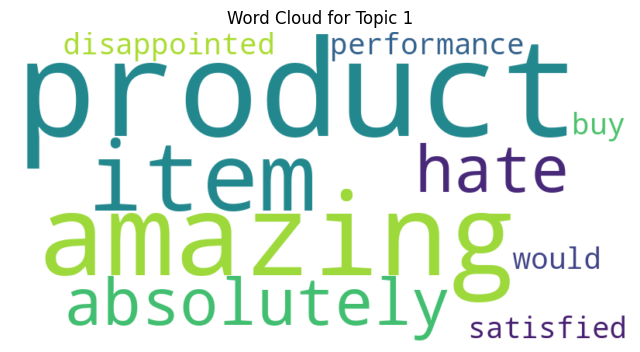

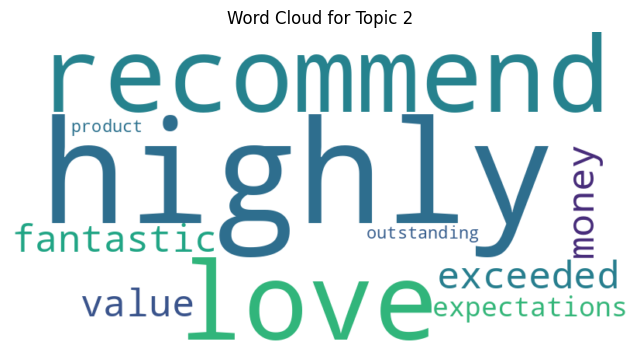

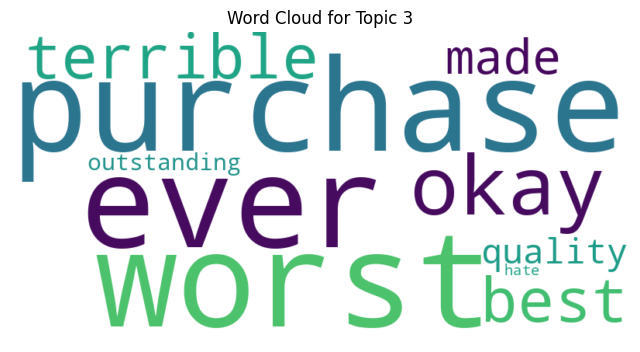

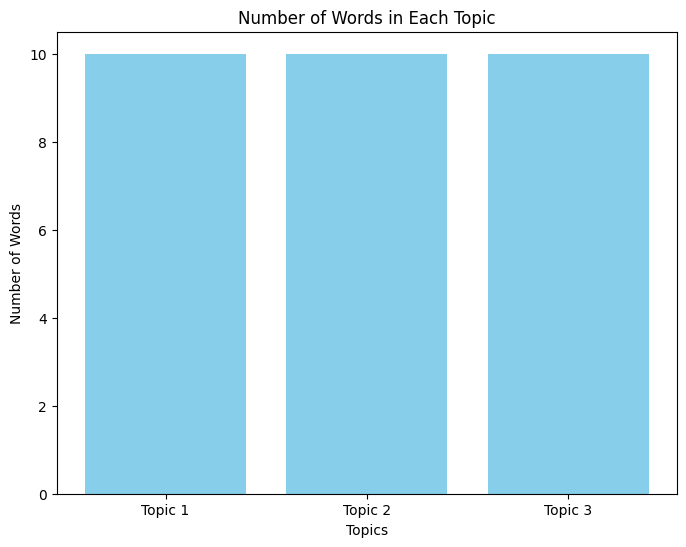

In [35]:
# Install required libraries
!pip install nltk
!pip install gensim
!pip install pyLDAvis
!pip install matplotlib
!pip install wordcloud

# Import necessary libraries
import nltk
import gensim
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Sample data to analyze
reviews = [
    "This product is amazing!",
    "I love it, highly recommend!",
    "I absolutely hate this item.",
    "It's okay, not the best but not terrible.",
    "Worst purchase I've ever made.",
    "Product amazing!",
    "Love it, highly recommend!",
    "Absolutely hate item.",
    "Okay, not best, not terrible.",
    "Worst purchase ever.",
    "Outstanding quality!",
    "Very satisfied with product.",
    "Disappointed with performance.",
    "Fantastic value for money!",
    "Wouldn't buy again.",
    "Exceeded expectations!",
]

# Text preprocessing
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def clean_text(text):
    tokens = word_tokenize(text.lower())
    return [word for word in tokens if word.isalnum() and word not in stop_words]

cleaned_corpus = [clean_text(review) for review in reviews]

# Create a dictionary and corpus for LDA
dictionary = gensim.corpora.Dictionary(cleaned_corpus)
corpus = [dictionary.doc2bow(text) for text in cleaned_corpus]

# Fit the LDA model
topic_count = 3  # Number of topics to extract
lda_model = gensim.models.LdaModel(corpus, num_topics=topic_count, id2word=dictionary, passes=10)

# Visualization 1: Word Cloud for Each Topic
for i in range(topic_count):
    words = lda_model.show_topic(i, topn=10)
    word_freq = {word: weight for word, weight in words}

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for Topic {i + 1}")
    plt.show()

# Visualization 2: Bar Chart for Topic Word Counts
topic_data = lda_model.show_topics(formatted=False)
word_counts = [len(topic[1]) for topic in topic_data]

plt.figure(figsize=(8, 6))
plt.bar(range(topic_count), word_counts, color='skyblue')
plt.xlabel("Topics")
plt.ylabel("Number of Words")
plt.title("Number of Words in Each Topic")
plt.xticks(range(topic_count), [f"Topic {i + 1}" for i in range(topic_count)])
plt.show()

# Visualization 3: LDA Visualization with pyLDAvis
pyLDAvis.enable_notebook()
visualization = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(visualization)


## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 40 points.**

In [36]:
# Write your code here
''' I discovered that each approach had distinct advantages and disadvantages after contrasting BERTopic, LDA, LDA2Vec, and LSA on a small text corpus.
But I ran across problems using LDA2Vec, which made it less useful for my analysis.
BERTopic performed poorly on my little corpus of only six documents, despite being effective on huge datasets. It was less appropriate for cases with minimal data since it produced computational mistakes and failed to generate significant subjects. This approach performs best on intricate, sizable datasets where it can use its clustering power to fine-tune topic discrimination.
LDA, on the other hand, did remarkably well with the smaller corpus. It offered ideas that were logical, understandable, and successfully captured overlapping themes. The LDA approach is appropriate for datasets with various themes because it makes topic distributions across documents visually accessible.
Due to its emphasis on singular value decomposition, LSA, the alternative to LDA, generated more generic subjects despite providing a wider overview of themes.
LSA can detect broad themes, but it is not as accurate as LDA at separating specific topics, particularly in small datasets.
Overall, because of its interpretability and adaptability when dealing with overlapping themes, I suggest LDA for small datasets, whereas LSA is less successful for in-depth analysis but may be helpful for spotting broad trends.
'''


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


' I discovered that each approach had distinct advantages and disadvantages after contrasting BERTopic, LDA, LDA2Vec, and LSA on a small text corpus. \nBut I ran across problems using LDA2Vec, which made it less useful for my analysis.\nBERTopic performed poorly on my little corpus of only six documents, despite being effective on huge datasets. It was less appropriate for cases with minimal data since it produced computational mistakes and failed to generate significant subjects. This approach performs best on intricate, sizable datasets where it can use its clustering power to fine-tune topic discrimination.\nLDA, on the other hand, did remarkably well with the smaller corpus. It offered ideas that were logical, understandable, and successfully captured overlapping themes. The LDA approach is appropriate for datasets with various themes because it makes topic distributions across documents visually accessible.\nDue to its emphasis on singular value decomposition, LSA, the alternative

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [38]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:

# Contemplative Comments on the Task

Educational Experience:
It has been a worthwhile learning experience to work with text data and extract features using different topic modeling methods.
I became more knowledgeable about the differences between algorithms like LDA, LSA, and BERTopic and how they handle text data.
The implementations made the subtleties of feature extraction more understandable, particularly with regard to how each algorithm classifies and finds subjects according to word distributions.
For small datasets, I found LDA to be especially user-friendly and efficient, highlighting the significance of choosing the appropriate model based on the volume of data.

The difficulties encountered:
BERTopic was one of the major obstacles I had to overcome. My corpus's small size made it difficult for it to provide relevant subjects and led to computational errors.
This experience taught me the value of dataset suitability for particular algorithms and that I must modify my strategy based on the properties of the data.

Applicability to my Subject of Study:
Given that topic modeling is a fundamental method for comprehending and evaluating text data, this activity has a lot to do with the discipline of natural language processing (NLP).
Finding underlying themes and extracting features from textual data is essential for applications such as content summarization, information retrieval, and sentiment analysis.
This practical experience helped me better grasp how topic modeling might be used in actual NLP tasks in addition to improving my technical proficiency.




'''

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


"\nPlease write you answer here:\n\n# Contemplative Comments on the Task\n\nEducational Experience:\nIt has been a worthwhile learning experience to work with text data and extract features using different topic modeling methods. \nI became more knowledgeable about the differences between algorithms like LDA, LSA, and BERTopic and how they handle text data. \nThe implementations made the subtleties of feature extraction more understandable, particularly with regard to how each algorithm classifies and finds subjects according to word distributions. \nFor small datasets, I found LDA to be especially user-friendly and efficient, highlighting the significance of choosing the appropriate model based on the volume of data.\n\nThe difficulties encountered: \nBERTopic was one of the major obstacles I had to overcome. My corpus's small size made it difficult for it to provide relevant subjects and led to computational errors. \nThis experience taught me the value of dataset suitability for par